In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [21]:

np.random.seed(42)
n_samples = 1000


size = np.random.normal(1500, 500, n_samples)  # House size in sq ft
bedrooms = np.random.randint(1, 6, n_samples)  # Number of bedrooms
bathrooms = np.random.randint(1, 4, n_samples)  # Number of bathrooms
age = np.random.randint(0, 50, n_samples)  # Age of house
location_score = np.random.uniform(1, 10, n_samples)  # Location desirability score


price = (
    size * 100 +  
    bedrooms * 5000 +  
    bathrooms * 8000 +  
    location_score * 10000 +  
    -age * 200 +  
    (size ** 1.2) * 0.01 + 
    np.random.normal(0, 10000, n_samples) 
)


df = pd.DataFrame({
    'size': size,
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'age': age,
    'location_score': location_score,
    'price': price
})

print("Dataset created successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset created successfully!
Dataset shape: (1000, 6)

First few rows:


,size,bedrooms,bathrooms,age,location_score,price
0,1748.357077,4,3,32,1.129433,224911.765825
1,1430.867849,1,3,49,7.879180,246213.994491
2,1823.844269,3,1,37,6.613688,255043.938678
3,2261.514928,5,3,26,7.860724,360007.670493
4,1382.923313,3,3,33,1.350442,170317.185543


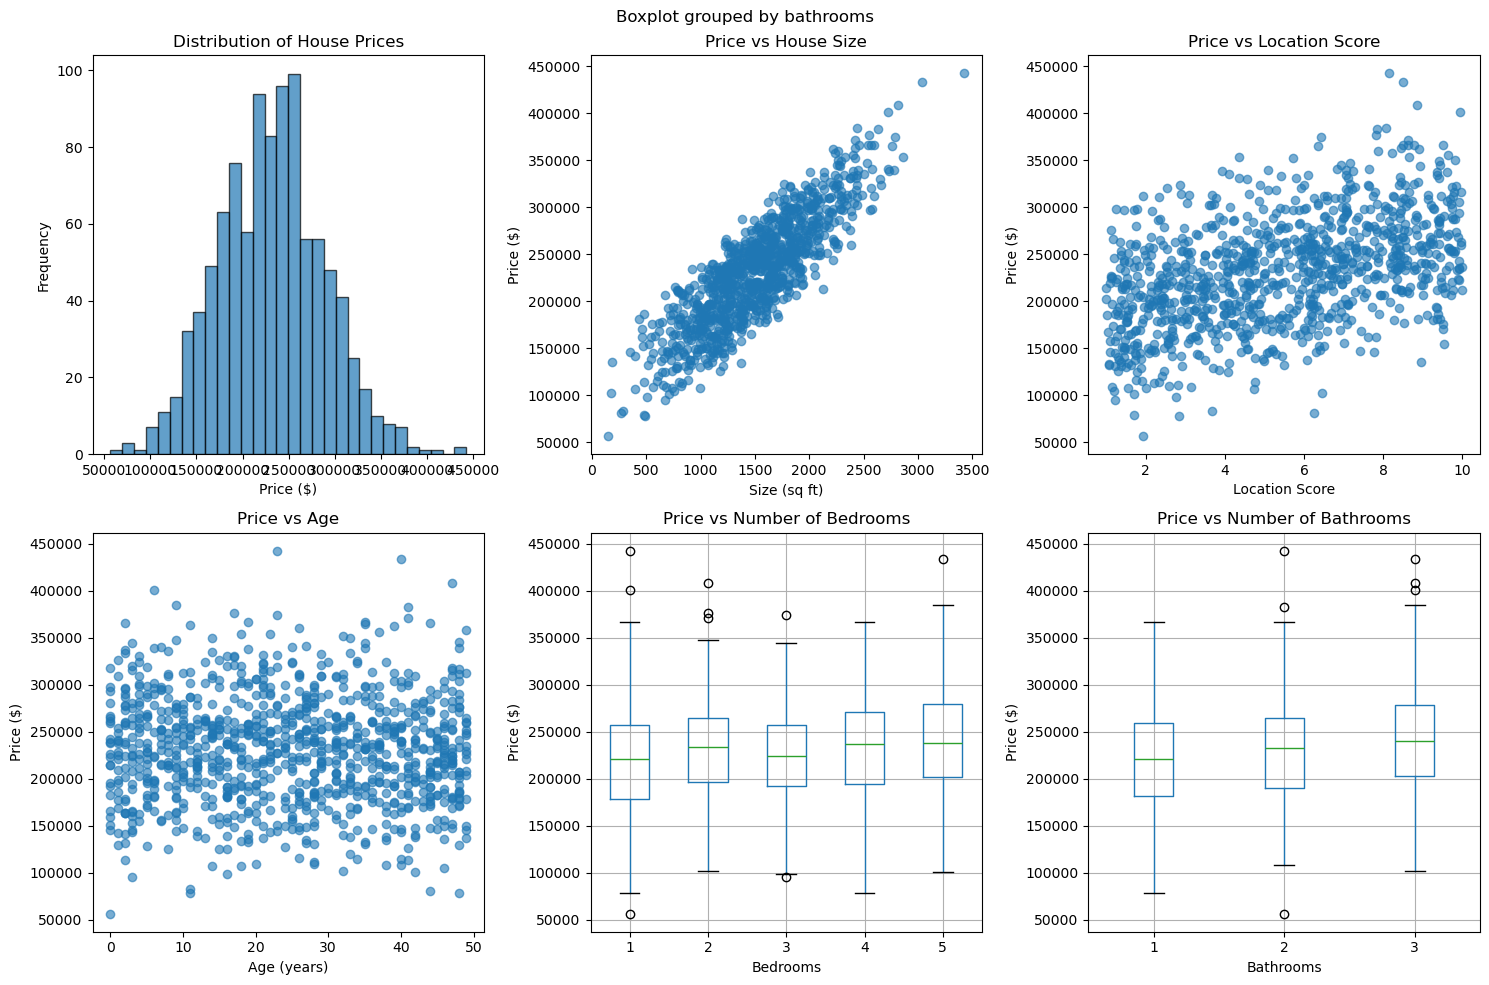

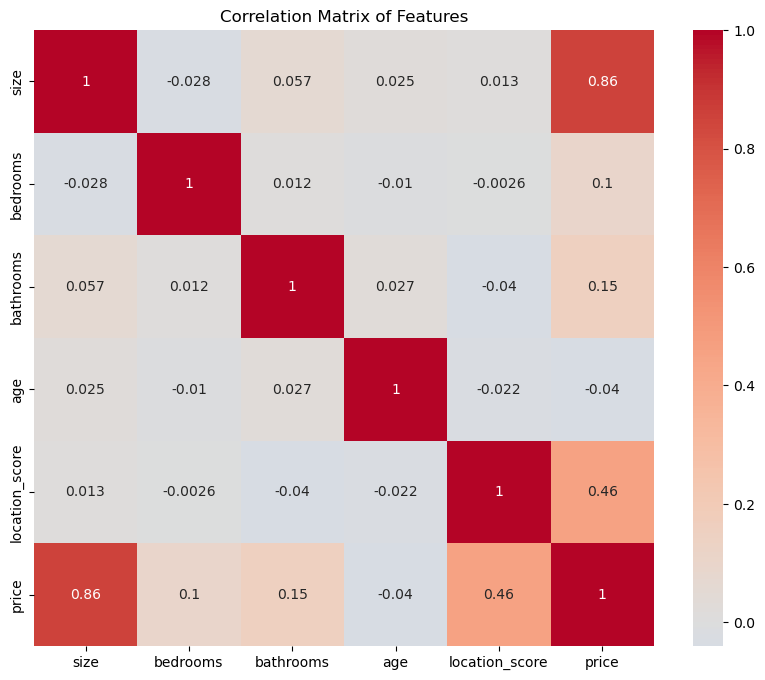

In [22]:

plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 1)
plt.hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')


plt.subplot(2, 3, 2)
plt.scatter(df['size'], df['price'], alpha=0.6)
plt.title('Price vs House Size')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')

plt.subplot(2, 3, 3)
plt.scatter(df['location_score'], df['price'], alpha=0.6)
plt.title('Price vs Location Score')
plt.xlabel('Location Score')
plt.ylabel('Price ($)')


plt.subplot(2, 3, 4)
plt.scatter(df['age'], df['price'], alpha=0.6)
plt.title('Price vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Price ($)')


plt.subplot(2, 3, 5)
df.boxplot(column='price', by='bedrooms', ax=plt.gca())
plt.title('Price vs Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price ($)')


plt.subplot(2, 3, 6)
df.boxplot(column='price', by='bathrooms', ax=plt.gca())
plt.title('Price vs Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

In [23]:

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

print("\nFeature statistics:")
print(X.describe())

Training set size: (800, 5)
Test set size: (200, 5)

Feature statistics:
              size     bedrooms    bathrooms          age  location_score
count  1000.000000  1000.000000  1000.000000  1000.000000     1000.000000
mean   1509.666028     3.045000     1.985000    24.583000        5.402987
std     489.607969     1.424431     0.835148    14.630077        2.582908
min    -120.633670     1.000000     1.000000     0.000000        1.000276
25%    1176.204847     2.000000     1.000000    12.000000        3.108452
50%    1512.650306     3.000000     2.000000    25.000000        5.387949
75%    1823.971938     4.000000     3.000000    37.000000        7.572057
max    3426.365745     5.000000     3.000000    49.000000        9.996019


In [24]:
# Check for NaN values in the dataset
print("Checking for NaN values:")
print("Dataset shape:", df.shape)
print("\nNaN values per column:")
print(df.isnull().sum())
print("\nDataset info:")
print(df.info())
print("\nPrice statistics:")
print(df['price'].describe())

Checking for NaN values:
Dataset shape: (1000, 6)

NaN values per column:
size              0
bedrooms          0
bathrooms         0
age               0
location_score    0
price             1
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   size            1000 non-null   float64
 1   bedrooms        1000 non-null   int32  
 2   bathrooms       1000 non-null   int32  
 3   age             1000 non-null   int32  
 4   location_score  1000 non-null   float64
 5   price           999 non-null    float64
dtypes: float64(3), int32(3)
memory usage: 35.3 KB
None

Price statistics:
count       999.000000
mean     231298.183649
std       57373.736526
min       56611.624973
25%      191476.864908
50%      232310.774755
75%      266947.675473
max      442417.565242
Name: price, dtype: float64


In [25]:
# Fix the NaN values - remove rows with NaN in price
print("Before cleaning:")
print(f"Dataset shape: {df.shape}")
print(f"NaN values in price: {df['price'].isnull().sum()}")

# Remove rows with NaN values
df_clean = df.dropna()

print("\nAfter cleaning:")
print(f"Dataset shape: {df_clean.shape}")
print(f"NaN values in price: {df_clean['price'].isnull().sum()}")

# Update the data for modeling
X = df_clean.drop('price', axis=1)
y = df_clean['price']

# Split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nCleaned training set size: {X_train.shape}")
print(f"Cleaned test set size: {X_test.shape}")
print(f"Any NaN in y_train: {y_train.isnull().sum()}")
print(f"Any NaN in y_test: {y_test.isnull().sum()}")

Before cleaning:
Dataset shape: (1000, 6)
NaN values in price: 1

After cleaning:
Dataset shape: (999, 6)
NaN values in price: 0

Cleaned training set size: (799, 5)
Cleaned test set size: (200, 5)
Any NaN in y_train: 0
Any NaN in y_test: 0


In [26]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


y_pred_linear = linear_model.predict(X_test)


mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Results:")
print(f"RMSE: ${rmse_linear:,.2f}")
print(f"MAE: ${mae_linear:,.2f}")
print(f"R² Score: {r2_linear:.4f}")


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})
print("\nFeature Coefficients:")
print(feature_importance.sort_values('Coefficient', key=abs, ascending=False))

Linear Regression Results:
RMSE: $10,106.53
MAE: $8,287.87
R² Score: 0.9652

Feature Coefficients:
          Feature   Coefficient
4  location_score  10084.976150
2       bathrooms   8253.253538
1        bedrooms   5066.339762
3             age   -216.425999
0            size    100.042863


In [27]:


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
best_alpha = None
best_score = -np.inf

for alpha in alphas:
    ridge_temp = Ridge(alpha=alpha)
    ridge_temp.fit(X_train_scaled, y_train)
    score = ridge_temp.score(X_test_scaled, y_test)
    print(f"Alpha: {alpha}, R² Score: {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_alpha = alpha

print(f"\nBest Alpha: {best_alpha}")


ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_scaled, y_train)


y_pred_ridge = ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\nRidge Regression Results (α={best_alpha}):")
print(f"RMSE: ${rmse_ridge:,.2f}")
print(f"MAE: ${mae_ridge:,.2f}")
print(f"R² Score: {r2_ridge:.4f}")

ridge_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_model.coef_
})
print("\nRidge Feature Coefficients:")
print(ridge_importance.sort_values('Coefficient', key=abs, ascending=False))

Alpha: 0.1, R² Score: 0.9652
Alpha: 1.0, R² Score: 0.9652
Alpha: 10.0, R² Score: 0.9650
Alpha: 100.0, R² Score: 0.9525
Alpha: 1000.0, R² Score: 0.6682

Best Alpha: 0.1

Ridge Regression Results (α=0.1):
RMSE: $10,106.72
MAE: $8,288.20
R² Score: 0.9652

Ridge Feature Coefficients:
          Feature   Coefficient
0            size  49318.393258
4  location_score  25959.741939
1        bedrooms   7194.462294
2       bathrooms   6895.793597
3             age  -3164.534607


In [28]:

degrees = [2, 3, 4]
best_degree = None
best_poly_score = -np.inf

for degree in degrees:
    
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    
    poly_model_temp = LinearRegression()
    poly_model_temp.fit(X_train_poly, y_train)
    
    
    score = poly_model_temp.score(X_test_poly, y_test)
    print(f"Degree: {degree}, R² Score: {score:.4f}, Features: {X_train_poly.shape[1]}")
    
    if score > best_poly_score:
        best_poly_score = score
        best_degree = degree

print(f"\nBest Polynomial Degree: {best_degree}")

poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


y_pred_poly = poly_model.predict(X_test_poly)


mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nPolynomial Regression Results (degree={best_degree}):")
print(f"RMSE: ${rmse_poly:,.2f}")
print(f"MAE: ${mae_poly:,.2f}")
print(f"R² Score: {r2_poly:.4f}")
print(f"Number of features: {X_train_poly.shape[1]}")

Degree: 2, R² Score: 0.9656, Features: 20
Degree: 3, R² Score: 0.9658, Features: 55
Degree: 4, R² Score: 0.9633, Features: 125

Best Polynomial Degree: 3

Polynomial Regression Results (degree=3):
RMSE: $10,017.29
MAE: $8,224.06
R² Score: 0.9658
Number of features: 55


Model Comparison:
                   Model          RMSE          MAE  R² Score
0      Linear Regression  10106.528994  8287.865588  0.965223
1       Ridge Regression  10106.719769  8288.203130  0.965221
2  Polynomial Regression  10017.292012  8224.061091  0.965834


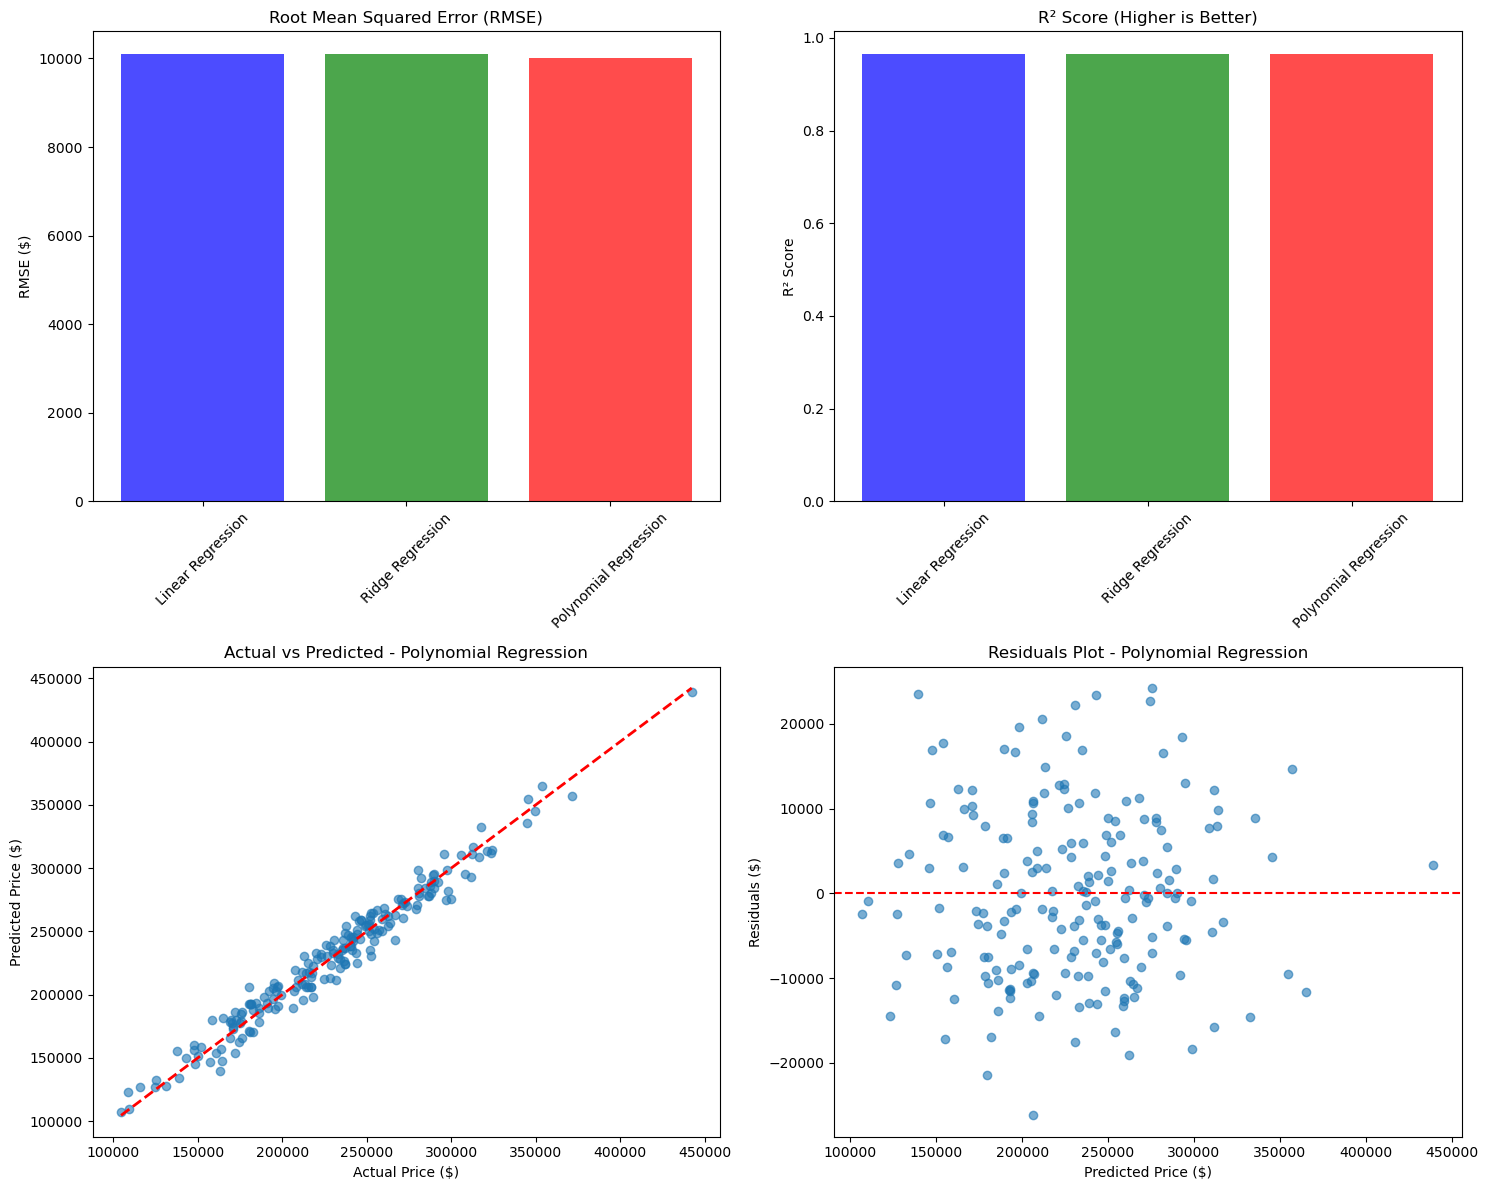


Best performing model: Polynomial Regression
Best R² Score: 0.9658


In [29]:

results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Polynomial Regression'],
    'RMSE': [rmse_linear, rmse_ridge, rmse_poly],
    'MAE': [mae_linear, mae_ridge, mae_poly],
    'R² Score': [r2_linear, r2_ridge, r2_poly]
})

print("Model Comparison:")
print(results_df)


fig, axes = plt.subplots(2, 2, figsize=(15, 12))


axes[0, 0].bar(results_df['Model'], results_df['RMSE'], color=['blue', 'green', 'red'], alpha=0.7)
axes[0, 0].set_title('Root Mean Squared Error (RMSE)')
axes[0, 0].set_ylabel('RMSE ($)')
axes[0, 0].tick_params(axis='x', rotation=45)


axes[0, 1].bar(results_df['Model'], results_df['R² Score'], color=['blue', 'green', 'red'], alpha=0.7)
axes[0, 1].set_title('R² Score (Higher is Better)')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].tick_params(axis='x', rotation=45)

best_model_idx = results_df['R² Score'].idxmax()
best_model_name = results_df.iloc[best_model_idx]['Model']

if best_model_name == 'Linear Regression':
    y_pred_best = y_pred_linear
elif best_model_name == 'Ridge Regression':
    y_pred_best = y_pred_ridge
else:
    y_pred_best = y_pred_poly

axes[1, 0].scatter(y_test, y_pred_best, alpha=0.6)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Price ($)')
axes[1, 0].set_ylabel('Predicted Price ($)')
axes[1, 0].set_title(f'Actual vs Predicted - {best_model_name}')


residuals = y_test - y_pred_best
axes[1, 1].scatter(y_pred_best, residuals, alpha=0.6)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Price ($)')
axes[1, 1].set_ylabel('Residuals ($)')
axes[1, 1].set_title(f'Residuals Plot - {best_model_name}')

plt.tight_layout()
plt.show()

print(f"\nBest performing model: {best_model_name}")
print(f"Best R² Score: {results_df['R² Score'].max():.4f}")

In [30]:

def predict_house_price(size, bedrooms, bathrooms, age, location_score, model_type='best'):
    """
    Predict house price using specified model
    """
    
    input_data = np.array([[size, bedrooms, bathrooms, age, location_score]])
    input_df = pd.DataFrame(input_data, columns=['size', 'bedrooms', 'bathrooms', 'age', 'location_score'])
    
    if model_type == 'linear' or (model_type == 'best' and best_model_name == 'Linear Regression'):
        prediction = linear_model.predict(input_df)[0]
    elif model_type == 'ridge' or (model_type == 'best' and best_model_name == 'Ridge Regression'):
        input_scaled = scaler.transform(input_df)
        prediction = ridge_model.predict(input_scaled)[0]
    else: 
        input_poly = poly_features.transform(input_df)
        prediction = poly_model.predict(input_poly)[0]
    
    return prediction


print("Example House Price Predictions:")
print("="*50)


price1 = predict_house_price(1200, 2, 1, 10, 6.5)
print(f"House 1 - Size: 1200 sq ft, 2 bed, 1 bath, 10 years old, Location: 6.5/10")
print(f"Predicted Price: ${price1:,.2f}")


price2 = predict_house_price(2500, 4, 3, 5, 9.0)
print(f"\nHouse 2 - Size: 2500 sq ft, 4 bed, 3 bath, 5 years old, Location: 9.0/10")
print(f"Predicted Price: ${price2:,.2f}")


price3 = predict_house_price(1800, 3, 2, 30, 4.0)
print(f"\nHouse 3 - Size: 1800 sq ft, 3 bed, 2 bath, 30 years old, Location: 4.0/10")
print(f"Predicted Price: ${price3:,.2f}")

print(f"\nAll predictions made using: {best_model_name}")

Example House Price Predictions:
House 1 - Size: 1200 sq ft, 2 bed, 1 bath, 10 years old, Location: 6.5/10
Predicted Price: $203,923.41

House 2 - Size: 2500 sq ft, 4 bed, 3 bath, 5 years old, Location: 9.0/10
Predicted Price: $383,554.84

House 3 - Size: 1800 sq ft, 3 bed, 2 bath, 30 years old, Location: 4.0/10
Predicted Price: $244,095.24

All predictions made using: Polynomial Regression
